In [1]:
#task_13假设一颗大质量的恒星为40,000 K的O型星，其热光度为太阳的10万倍，假设周围是中性星际气体（全部为氢原子，n~10cm-3)均匀分布，
#其在10000年内能电离的球形空间的半径为多大？
#请对银河系中的各种物质成分的质量比进行估算
import numpy as np

# 给定参数
L_star = 1e5  # 恒星光度，单位为太阳光度
n_H = 10  # 中性氢的数密度，单位为 cm^-3
alpha_B = 2.6e-13  # 重组系数，单位为 cm^3/s

# 估算 N_ion
L_sun = 3.828e33  # 太阳光度，单位为 erg/s
E_ion = 13.6 * 1.60218e-12  # 电离光子的能量，单位为 erg（13.6 eV 转换为 erg）
L_star_erg = L_star * L_sun  # 将恒星光度转换为 erg/s
N_ion = L_star_erg / E_ion  # 每秒释放的电离光子数

# 计算 Stromgren 半径
R_s = ((3 * N_ion) / (4 * np.pi * alpha_B * n_H**2))**(1/3)
R_s_pc = R_s / 3.086e18  # 将单位从 cm 转换为 parsec

print(f"电离球半径约为 {R_s_pc:.2f} pc")


电离球半径约为 17.64 pc


### 2. 银河系中的物质成分质量比估算

银河系中的物质成分可以分为以下几类：

1. **恒星**：约占银河系总质量的 \( \sim 5\% \)。
2. **气体**：主要由氢和氦组成，约占总质量的 \( \sim 10\% \)。
3. **暗物质**：占总质量的 \( \sim 85\% \)。

#### 质量比
- **恒星与气体之比**：约为 1:2。
- **恒星与暗物质之比**：约为 1:17。
- **气体与暗物质之比**：约为 1:8.5。

### 详细解释
- 银河系的总质量约为 \( 10^{12} M_\odot \)，其中暗物质是主导成分，恒星和气体只占少部分。
- 气体主要分布在银盘和银晕区域，暗物质形成巨大的晕包围整个星系。

SIMPLE  =                    T                                                  BITPIX  =                   16                                                  NAXIS   =                    2                                                  NAXIS1  =                 2048                                                  NAXIS2  =                 1489                                                  BZERO   = 3.27680000000000E+04                                                  BSCALE  = 1.00000000000000E+00                                                  TAI     =        4513036852.23 / 1st row - Number of seconds since Nov 17 1858  RA      =            18.881586 / 1st row - Right ascension of telescope boresighDEC     =            0.000000  / 1st row - Declination of telescope boresight (dSPA     =              90.000  / 1st row - Camera col position angle wrt north (IPA     =              67.252  / 1st row - Instrument rotator position angle (deIPARATE =              0.0000  / 1st row

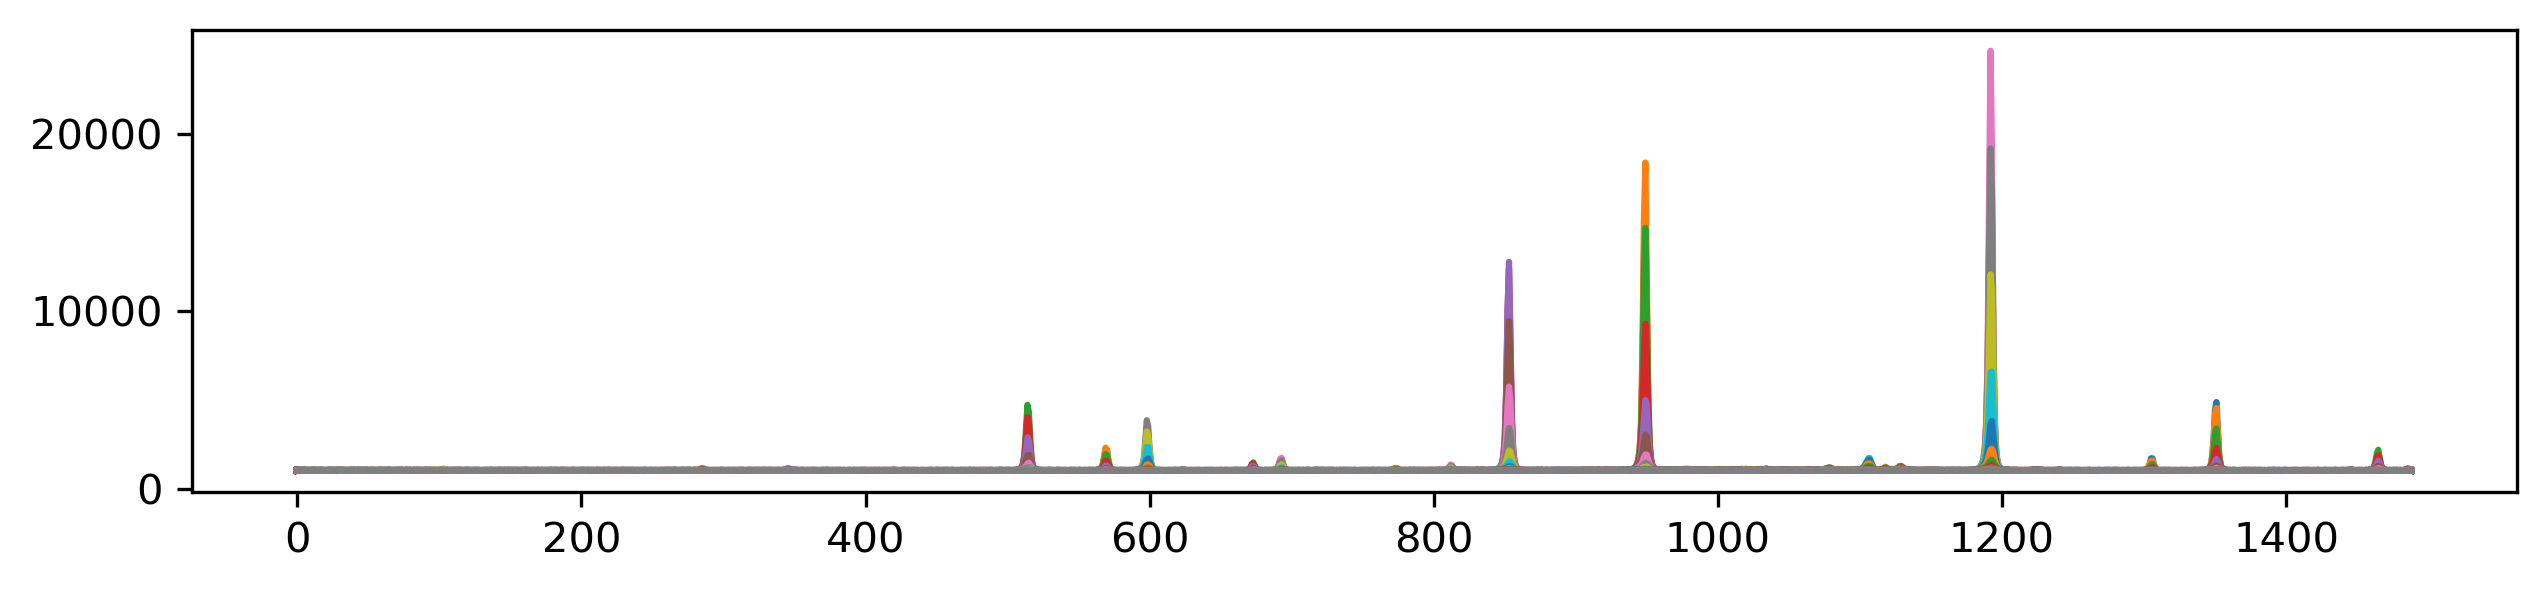

In [13]:
#task_15. 下载一个LAMOST或者SDSS观测到的星系光谱文件，画出相应光
#谱，测量至少一个Lick指数特征及其误差，并在图中标注
#• SDSS的光谱分辨率是~2000，某星系其连续谱单位波长的典型信
#噪比为5，该星系Ha线的等值宽度为50A，请问其Ha线流量的信噪
#比是多少？
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import sys
import os
#from lick import Lick

#specf = "drC-002738-u1-0044.fits"
#spec = fits.open(specf)[0].data
#wavelength = spec["WAVELENGTH"][0]
#flux = spec["FLUX"][0]
#
#plt.figure(figsize=(10, 2), dpi=300)
#plt.plot(wavelength, flux, linewidth=0.3)
#plt.xlim(np.min(wavelength), np.max(wavelength))
#plt.show()




#读取 FITS 文件
filename = 'drC-002738-u1-0044.fits' 
hdul = fits.open(filename)
data = hdul[0].data
header = hdul[0].header
print(header)
plt.figure(figsize=(10, 2), dpi=300)
plt.plot(data)
plt.show()


SDSS的光谱分辨率是~2000，某星系其连续谱单位波长的典型信噪比为5，该星系Ha线的等值宽度为50A，请问其Ha线流量的信噪比是多少？

Number density of galaxies with r < 20.5 mag: 4.17e+00 per steradian
Ratio of galaxy counts (M_r = -16 / M_r = -22): 18.65


/var/folders/mz/pg3ztpgj1f10l242jx2qkjz80000gn/T/ipykernel_37509/2372526864.py:31: RuntimeWarning: divide by zero encountered in log10
  return m - 5 * np.log10(d_l * 1e6) + 5
/var/folders/mz/pg3ztpgj1f10l242jx2qkjz80000gn/T/ipykernel_37509/2372526864.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  number_density = np.trapz(phi_values * dV_dz_values, z_values)
/var/folders/mz/pg3ztpgj1f10l242jx2qkjz80000gn/T/ipykernel_37509/2372526864.py:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  P_z /= np.trapz(P_z, z_values)  # Normalize to make it a probability distribution


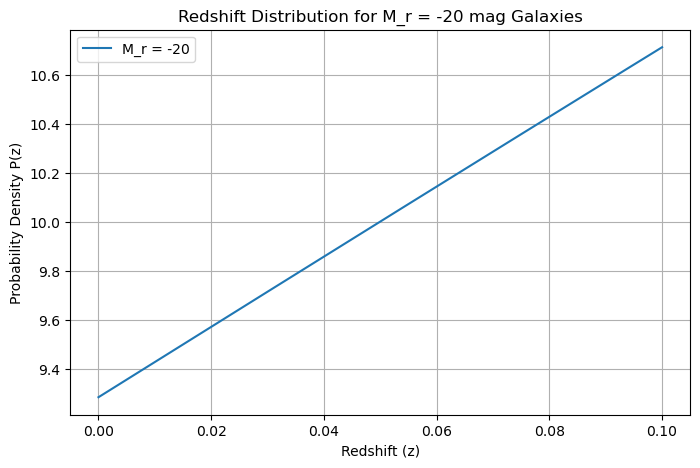

H-alpha line flux S/N: 19.52


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Schechter luminosity function parameters
M_star = -20.83  # SDSS Mr*
alpha = -1.0  # Faint-end slope
phi_star = 0.01  # Normalization (Mpc^-3)

# Constants
H0 = 70  # Hubble constant (km/s/Mpc)
c = 3e5  # Speed of light (km/s)

# Function to calculate the Schechter luminosity function
def schechter_function(M, M_star, alpha, phi_star):
    term = 10**(0.4 * (M_star - M))
    return 0.4 * np.log(10) * phi_star * term**(1 + alpha) * np.exp(-term)

# Function to calculate comoving volume element (dV/dz in Mpc^3 per steradian)
def comoving_volume_element(z, H0, Omega_m=0.3, Omega_L=0.7):
    """Comoving volume element per unit redshift per steradian."""
    Ez = np.sqrt(Omega_m * (1 + z)**3 + Omega_L)
    dV_dz = c / H0 * (1 + z)**2 / Ez
    return dV_dz

# 1. Number of galaxies with r < 20.5 mag
def number_density_r_limit(m_limit, M_star, alpha, phi_star, z_max):
    """Calculate the number density of galaxies with apparent magnitude limit."""
    def absolute_magnitude_limit(m, z):
        "Convert apparent magnitude to absolute magnitude at redshift z."
        d_l = c * z / H0 * (1 + z / 2)  # Luminosity distance approximation (Mpc)
        return m - 5 * np.log10(d_l * 1e6) + 5

    z_values = np.linspace(0, z_max, 1000)
    m_abs_limits = absolute_magnitude_limit(m_limit, z_values)
    phi_values = schechter_function(m_abs_limits, M_star, alpha, phi_star)
    dV_dz_values = comoving_volume_element(z_values, H0)
    
    number_density = np.trapz(phi_values * dV_dz_values, z_values)
    return number_density

# 2. Ratio of galaxy counts at M_r = -16 mag to M_r = -22 mag
def galaxy_count_ratio(M1, M2, M_star, alpha):
    phi1 = schechter_function(M1, M_star, alpha, phi_star)
    phi2 = schechter_function(M2, M_star, alpha, phi_star)
    return phi1 / phi2

# 3. Redshift distribution for galaxies with M_r = -20 mag
def redshift_distribution(M, M_star, alpha, phi_star, z_max):
    z_values = np.linspace(0, z_max, 1000)
    phi_values = schechter_function(M, M_star, alpha, phi_star)
    dV_dz_values = comoving_volume_element(z_values, H0)
    
    P_z = phi_values * dV_dz_values
    P_z /= np.trapz(P_z, z_values)  # Normalize to make it a probability distribution
    return z_values, P_z

# Inputs
m_limit = 20.5
z_max = 0.1  # Approximation for shallow surveys
M1, M2 = -16, -22
M_target = -20

# 1. Number density of galaxies
num_density = number_density_r_limit(m_limit, M_star, alpha, phi_star, z_max)
print(f"Number density of galaxies with r < {m_limit} mag: {num_density:.2e} per steradian")

# 2. Ratio of galaxy counts
ratio = galaxy_count_ratio(M1, M2, M_star, alpha)
print(f"Ratio of galaxy counts (M_r = {M1} / M_r = {M2}): {ratio:.2f}")

# 3. Redshift distribution
z_values, P_z = redshift_distribution(M_target, M_star, alpha, phi_star, z_max)

# Plot redshift distribution
plt.figure(figsize=(8, 5))
plt.plot(z_values, P_z, label=f"M_r = {M_target}")
plt.xlabel("Redshift (z)")
plt.ylabel("Probability Density P(z)")
plt.title("Redshift Distribution for M_r = -20 mag Galaxies")
plt.legend()
plt.grid()
plt.show()

# 4. H-alpha line S/N calculation
def ha_line_sn(SN_cont, W_lambda, R, lambda_ha=6563):
    """Calculate the S/N of H-alpha line flux."""
    delta_lambda = lambda_ha / R
    return SN_cont * np.sqrt(W_lambda / delta_lambda)

# Inputs for H-alpha calculation
SN_cont = 5  # S/N of continuum
W_lambda = 50  # Equivalent width in Angstroms
R = 2000  # Spectral resolution

SN_line = ha_line_sn(SN_cont, W_lambda, R)
print(f"H-alpha line flux S/N: {SN_line:.2f}")
